## Import All Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import plotly.express as px
import re
from datetime import datetime

from sklearn import metrics
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import math
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sb.set_style("whitegrid")
get_ipython().run_line_magic('matplotlib', 'inline')

# Reading Data File

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


>Displaying Top 5 Records

In [3]:
csv_file = "Reviews.csv"
df = pd.read_csv("/content/drive/MyDrive/DEPIMLProject/MohamedTalaat/Reviews.csv")
print("Number  of  Products  for  reviews :", len(df["ProductId"].unique()))
print("Number of Unique users for reviews :", len(df["UserId"].unique()))
pd.set_option("display.max_colwidth",100)
df.head()

Number  of  Products  for  reviews : 74258
Number of Unique users for reviews : 256059


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


#### Removing Uncessary Columns

>So that we can reduce processing time to make it work for slow systems too. You can take all the 568k records if your system is efficient enough

In [5]:
data = df.copy()
data = data.drop(["Id","UserId","Summary", "HelpfulnessNumerator", "HelpfulnessDenominator", "ProfileName"], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ProductId  568454 non-null  object
 1   Score      568454 non-null  int64 
 2   Time       568454 non-null  int64 
 3   Text       568454 non-null  object
dtypes: int64(2), object(2)
memory usage: 17.3+ MB


In [6]:
data.head()

,ProductId,Score,Time,Text
0,B001E4KFG0,5,1303862400,I have bought several of the Vitality canned dog food products and have found them all to be of ...
1,B00813GRG4,1,1346976000,Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted...
2,B000LQOCH0,4,1219017600,"This is a confection that has been around a few centuries. It is a light, pillowy citrus gelati..."
3,B000UA0QIQ,2,1307923200,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got thi...
4,B006K2ZZ7K,5,1350777600,Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very qu...


#### Removing Duplicates of the Data

In [7]:
# Display duplicated rows and their counts
duplicated_data = data[data[["Text","Score"]].duplicated(keep=False)] # Changed ٍScore to Score
duplicated_counts = duplicated_data[["Text","Score"]].value_counts() # Changed ٍScore to Score
duplicated_counts

Text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [8]:
# Drop duplicates based on 'Text' and 'Score' columns
data = data.drop_duplicates(subset=["Text", "Score"])

In [9]:
data[data.duplicated()].Score.value_counts()

,count
Score,


### Dropping null values

### Getting only unique Products

In [10]:
unique_products = len(data["ProductId"].unique())
print(f"Number of Unique Product IDs: {unique_products}")

Number of Unique Product IDs: 67563


### Data Exploration

In [11]:
data['Score'].value_counts()

,count
Score,
5,250745
4,56074
1,36280
3,29772
2,20804


>So that we will get the overview, without calculating number of each score

#### Histogram

>This graph is showing how many reviews get a specific score

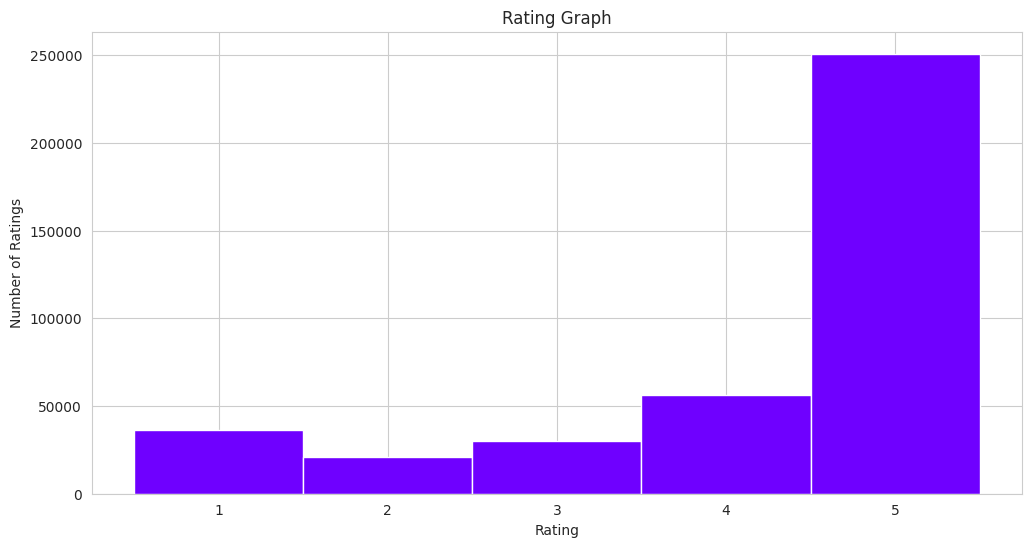

In [12]:
x_axis_rating = data["Score"]
x_axis_rating.hist(bins=[0.5,1.5,2.5,3.5,4.5,5.5], figsize=(12,6), grid=True, color="#6f00ff")

plt.title("Rating Graph")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")
plt.show()

#### Box-Plot

>Box-Plot gives the concentration data distribution

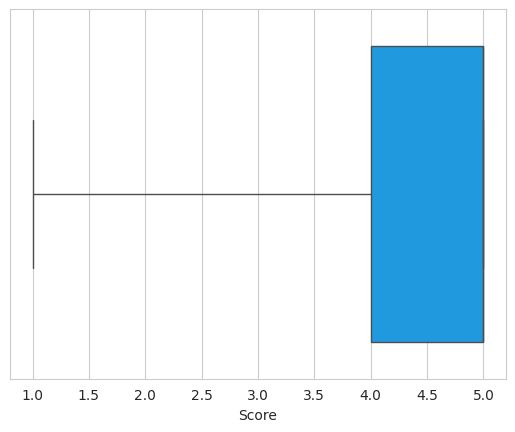

In [13]:
sb.boxplot(x="Score", data=data, whis=5, color="#00a2ff");

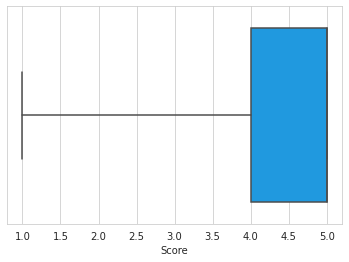

In [ ]:
# Create a boxplot using Seaborn
sb.boxplot(x="Score", data=data, whis=5, color="#00a2ff")

# Display the plot
plt.show()


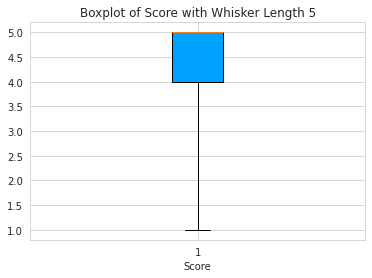

In [ ]:
import matplotlib.pyplot as plt

# Create a boxplot using Matplotlib
plt.boxplot(data['Score'], whis=5, patch_artist=True, boxprops=dict(facecolor="#00a2ff"))

# Customize the plot
plt.xlabel('Score')
plt.title('Boxplot of Score with Whisker Length 5')

# Display the plot
plt.show()


#### Violin-Plot

>Violin-Plot gives the frequency distribution of the data to visualize how the data is distributed and which points have more concentration of the data

<AxesSubplot:ylabel='Score'>

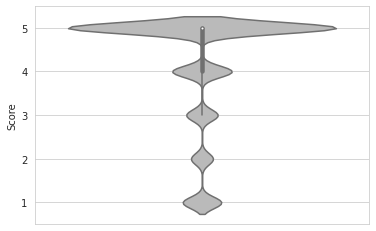

In [ ]:
sb.violinplot(y="Score", data=data, bw=0.1, color="#bababa")

In [14]:
data = data.dropna(subset=["Score"])

In [15]:
data[data.isna()].value_counts()

,,,,count
ProductId,Score,Time,Text,


>Our data does not have any null values, that's why it won't affect data

In [16]:
data["Score"] = data["Score"].astype(int)

### Data Exploration for further analysis

In [18]:
import seaborn as sns

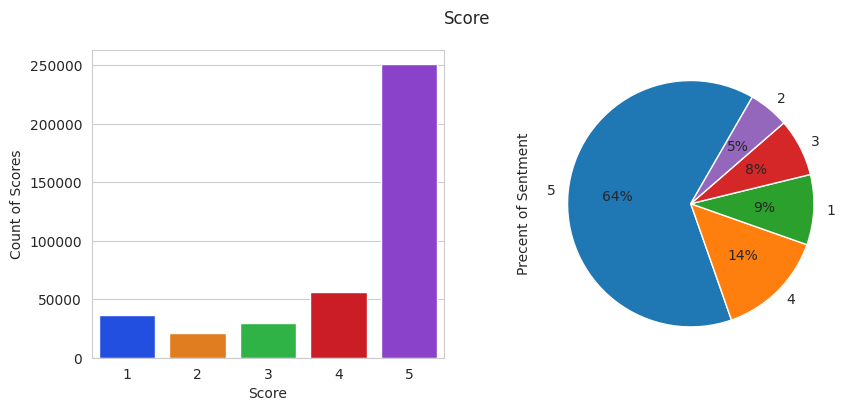

In [19]:
fig , ax = plt.subplots(1,2,figsize=(10,4))
sns.barplot(x=data['Score'].value_counts().index, y=data['Score'].value_counts(),palette='bright', ax=ax[0])
ax[0].set_ylabel('Count of Scores')
data['Score'].value_counts().plot.pie(autopct='%1.0f%%',startangle=60, ax=ax[1])
ax[1].set_ylabel('Precent of Sentment')
fig.suptitle('Score')
plt.show()

* ##### Make a copy from the DataFrame

In [24]:
df_copy = data.copy()

* ##### Calculate punctuation percentage

In [25]:
def label_sentiments(rating):
    if (rating == 5) or (rating == 4) or (rating == 3):
        return "Positive"
    else:
        return "Negative"

df_copy["Sentiment"] = df_copy["Score"].apply(label_sentiments)

In [26]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

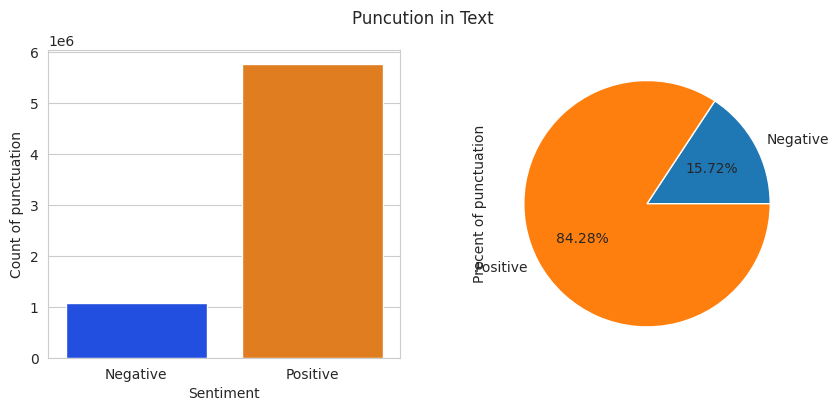

In [27]:
def count_punct(txt):
    count = sum([1 for i in txt if i in string.punctuation])
    return count

df_copy['count_punct'] = df_copy['Text'].apply(lambda x : count_punct(x))
punct = df_copy.groupby('Sentiment')['count_punct'].sum().reset_index()
punct['punct_precent'] = round((punct['count_punct'] / (punct['count_punct'].sum()) )*100, 2)
# print(punct)

fig , ax = plt.subplots(1,2,figsize=(10,4))
sns.barplot(x=punct['Sentiment'], y=punct['count_punct'],palette='bright', ax=ax[0])
ax[0].set_ylabel('Count of punctuation')
punct['punct_precent'].plot.pie(labels=punct['Sentiment'], autopct='%1.02f%%',startangle=0, ax=ax[1])
ax[1].set_ylabel('Precent of punctuation')

fig.suptitle('Puncution in Text')

plt.show()

* ##### Analyze common words sequence - Top 8

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
for label in df_copy["Sentiment"].unique():
  vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english')
  ngrams = vectorizer.fit_transform(df_copy[df_copy["Sentiment"] == label]['Text'])
  sum_ngrams = ngrams.sum(axis=0)
  words_freq = [(word, sum_ngrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
  # Top 8 n-grams
  print(label,':')
  print(words_freq[:8], '\n')

Positive :
[('br', 375500), ('br br', 150429), ('like', 143241), ('good', 124033), ('great', 108981), ('just', 100612), ('taste', 97969), ('product', 95681)] 

Negative :
[('br', 69945), ('like', 30301), ('br br', 27916), ('product', 24984), ('taste', 22602), ('just', 18809), ('good', 14768), ('coffee', 14195)] 



* ##### Calculate count of links

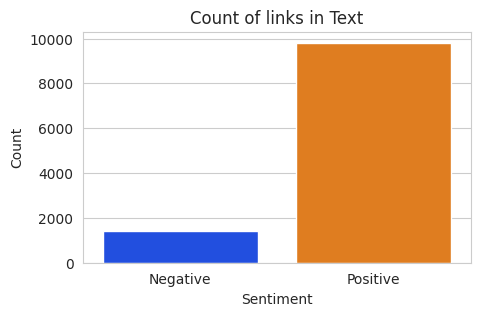

In [29]:
def count_link(txt):
    count = len(re.findall(r"\b(https?)",txt))
    return count

df_copy['count_link'] = df_copy['Text'].apply(lambda x : count_link(x))
links = df_copy.groupby('Sentiment')['count_link'].sum().reset_index()

plt.figure(figsize = (5,3))
sns.barplot(x=links['Sentiment'], y=links['count_link'],palette='bright')
plt.title('Count of links in Text')
plt.ylabel('Count')
plt.show()

* ##### Calculate count of digits

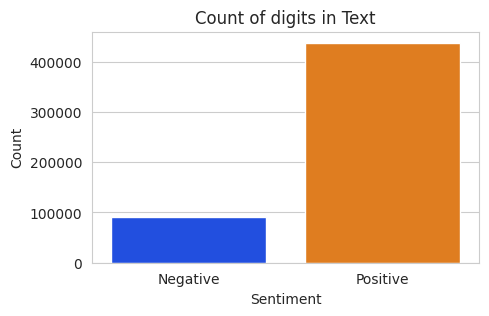

In [30]:
def count_digit(txt):
    count = len(re.findall(r"\b(one|two|three|four|five|six|seven|eight|nine|ten|\d+)\b",txt))
    return count

df_copy['count_digit'] = df_copy['Text'].apply(lambda x : count_digit(x))
digit = df_copy.groupby('Sentiment')['count_digit'].sum().reset_index()

plt.figure(figsize = (5,3))
sns.barplot(x=digit['Sentiment'], y=digit['count_digit'],palette='bright')
plt.title('Count of digits in Text')
plt.ylabel('Count')
plt.show()

* ##### calculate count of length in each sentiment

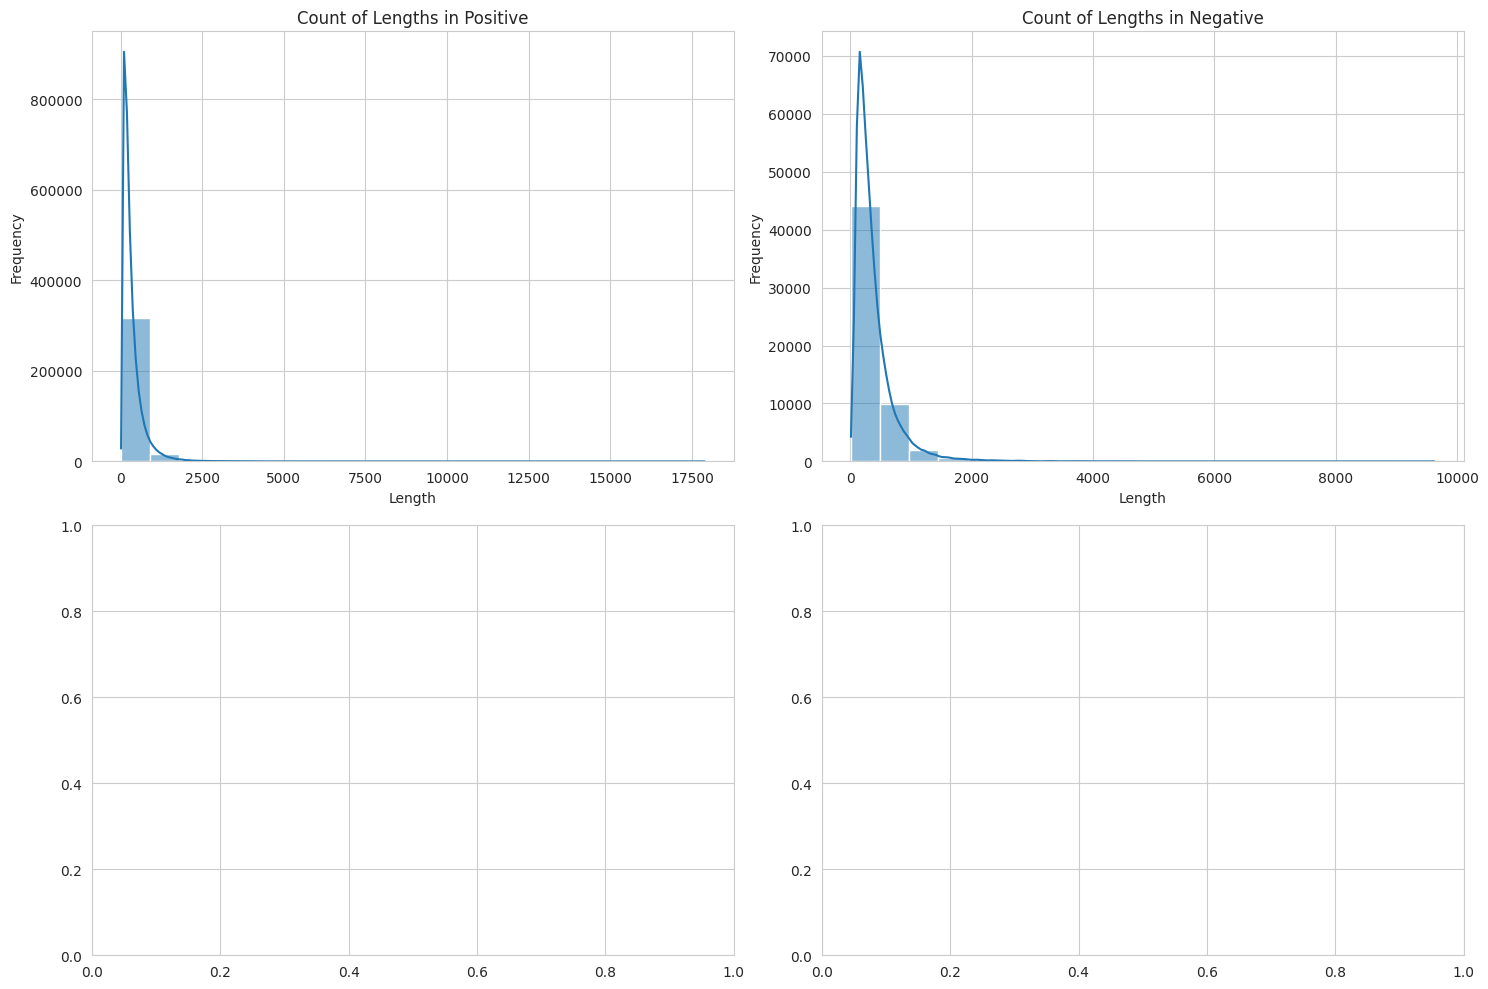

In [34]:
# Ensure df_copy has the 'Text' and 'Sentiment' columns
df_copy['length'] = df_copy['Text'].apply(lambda x: len(x) - x.count(' ') if isinstance(x, str) else 0)

# Create subplots
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Loop through unique sentiments
for i, label in enumerate(df_copy['Sentiment'].unique()):
    # Filter by sentiment
    sentiment_data = df_copy[df_copy['Sentiment'] == label]

    # Create a histogram of text lengths for the sentiment
    sns.histplot(sentiment_data['length'], ax=ax[i // 2, i % 2], bins=20, kde=True)

    # Set title
    ax[i // 2, i % 2].set_title(f"Count of Lengths in {label}")
    ax[i // 2, i % 2].set_xlabel('Length')
    ax[i // 2, i % 2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

#### Insights
* ###### The data is unbalanced
* ###### There are common words we need to remove from each category(ex: br, br br, like,just,taste)
* ###### Remove punctuation
* ###### Remove Links
* ###### Remove digits and numbers
* ###### Don't add length as a feature because all the sentiment have same distribution of review lengths - some times len is important because it represent corraltion of each review sentiment

###  Data Sampling to remove Data unbalanced

#### Taking Samples from Score Column

In [36]:
# Custom sampling logic based on the 'Score' value
data = data.groupby('Score').apply(lambda x: x.sample(
    n=8500 if x.name in [3, 4, 5] else 12500,
    random_state=42  # Ensures reproducibility
)).reset_index(drop=True)

# Check the new distribution
print(data['Score'].value_counts())

Score
1    12500
2    12500
3     8500
4     8500
5     8500
Name: count, dtype: int64


In [37]:
def label_sentiments(rating):
    if (rating == 5) or (rating == 4) or (rating == 3):
        return 1
    else:
        return 0

data["Sentiment"] = data["Score"].apply(label_sentiments)

In [38]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,25500
0,25000


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50500 entries, 0 to 50499
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ProductId  50500 non-null  object
 1   Score      50500 non-null  int64 
 2   Time       50500 non-null  int64 
 3   Text       50500 non-null  object
 4   Sentiment  50500 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.9+ MB


### Date Handling

In [40]:
# Function to convert timestamp
def convert_timestamp(ts):
    return datetime.fromtimestamp(ts / 1000)

# Apply the function to the 'timestamp' column
data['date'] = data['Time'].apply(convert_timestamp)

# Extract the year from the 'date' column
data['year'] = data['date'].dt.year

In [41]:
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [43]:
data['year'].value_counts()

,count
year,
1970,50500


In [ ]:
print(data['year'].value_counts())
print(data['month'].value_counts())
print(data['day'].value_counts())

year
1970    50500
Name: count, dtype: int64
month
1    50500
Name: count, dtype: int64
day
16    33045
15    14382
14     2972
13       97
12        4
Name: count, dtype: int64




```
# This is formatted as code
```

### EDA

#### Classifying the review on the basis of Score

In [44]:
data.columns

Index(['ProductId', 'Score', 'Time', 'Text', 'Sentiment', 'date', 'year',
       'month', 'day'],
      dtype='object')

#### number of reviews for each Day - Bar Chart - Trend Analysis

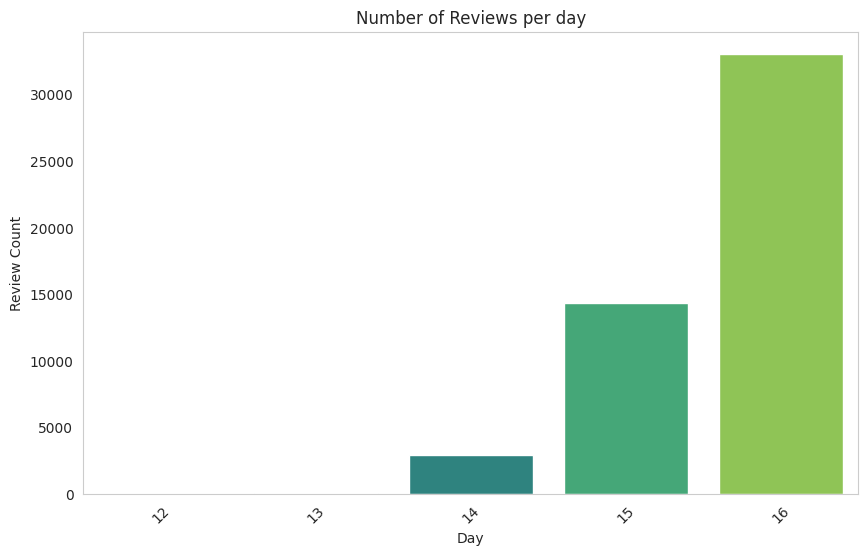

In [45]:
# Count the number of reviews for each day
review_counts_per_day = data.groupby('day').size().reset_index(name='review_count')

# Plot the review counts per year using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=review_counts_per_day, x='day', y='review_count', palette='viridis')
plt.title('Number of Reviews per day')
plt.xlabel('Day')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


#### number of reviews for each Day and Sentiment - Bar Chart - Trend Analysis

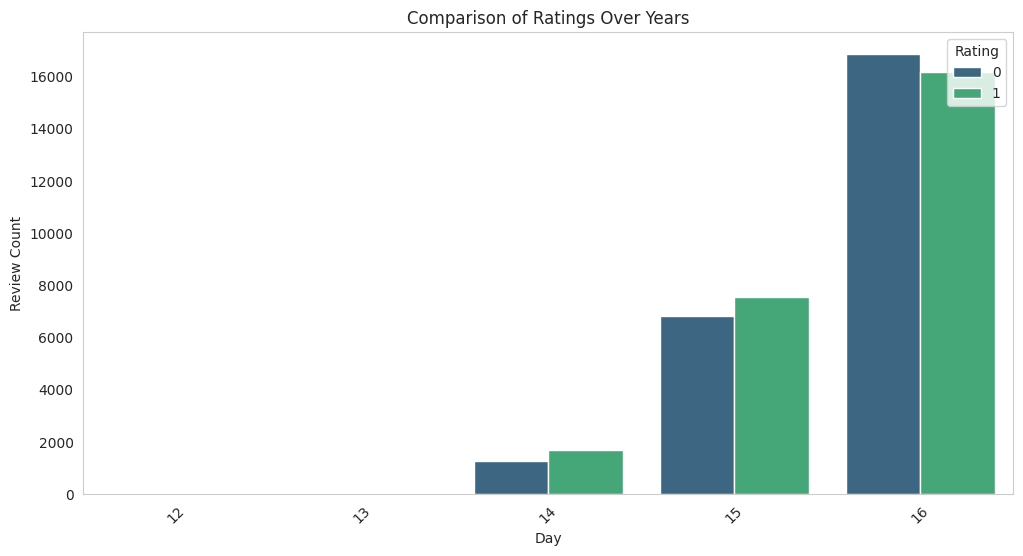

In [46]:
# Count the number of reviews for each year and rating
rating_counts_per_day = data.groupby(['day', 'Sentiment']).size().reset_index(name='review_count')

# Plot the comparison of ratings over the years
plt.figure(figsize=(12, 6))
sns.barplot(data=rating_counts_per_day, x='day', y='review_count', hue='Sentiment', palette='viridis')
plt.title('Comparison of Ratings Over Years')
plt.xlabel('Day')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.legend(title='Rating', loc='upper right')
plt.grid(axis='y')
plt.show()

#### number of reviews for each Day and Sentiment - Line Chart - Trend Analysis

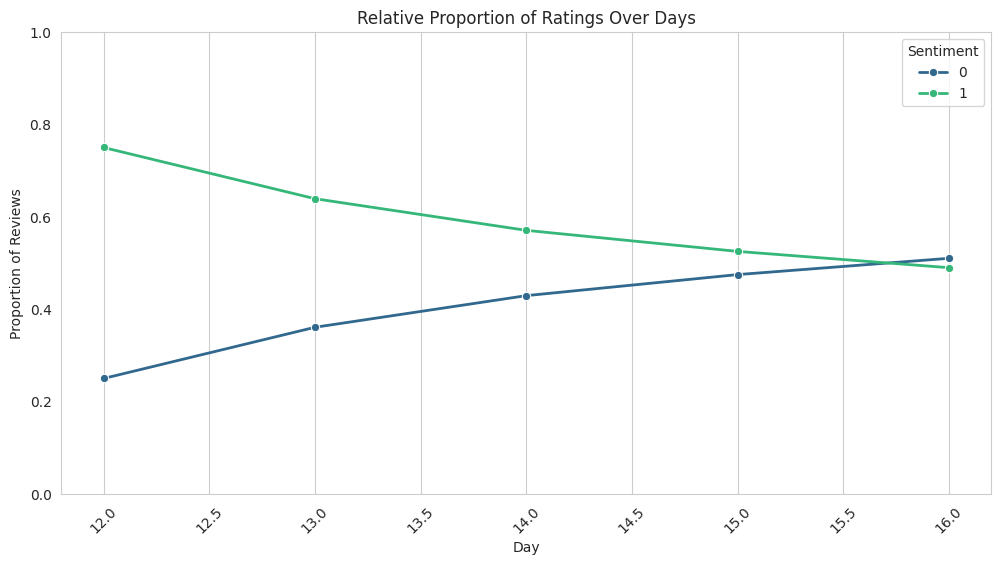

In [47]:
# Count the number of reviews for each year and rating
rating_counts_per_day = data.groupby(['day', 'Sentiment']).size().reset_index(name='review_count')

# Calculate total reviews per year
total_reviews_per_year = rating_counts_per_day.groupby('day')['review_count'].sum().reset_index(name='total_reviews')

# Merge to calculate proportions
rating_counts_per_day = rating_counts_per_day.merge(total_reviews_per_year, on='day')
rating_counts_per_day['proportion'] = rating_counts_per_day['review_count'] / rating_counts_per_day['total_reviews']

# Plotting the relative proportions of ratings over the years using a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=rating_counts_per_day, x='day', y='proportion', hue='Sentiment', marker='o', palette='viridis', linewidth=2)
plt.title('Relative Proportion of Ratings Over Days')
plt.xlabel('Day')
plt.ylabel('Proportion of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.ylim(0, 1)  # Set y-axis limits to show proportions
plt.grid(axis='y')
plt.show()

#### WordCloud Find the most common words that may affect the model

In [48]:
!pip install wordcloud

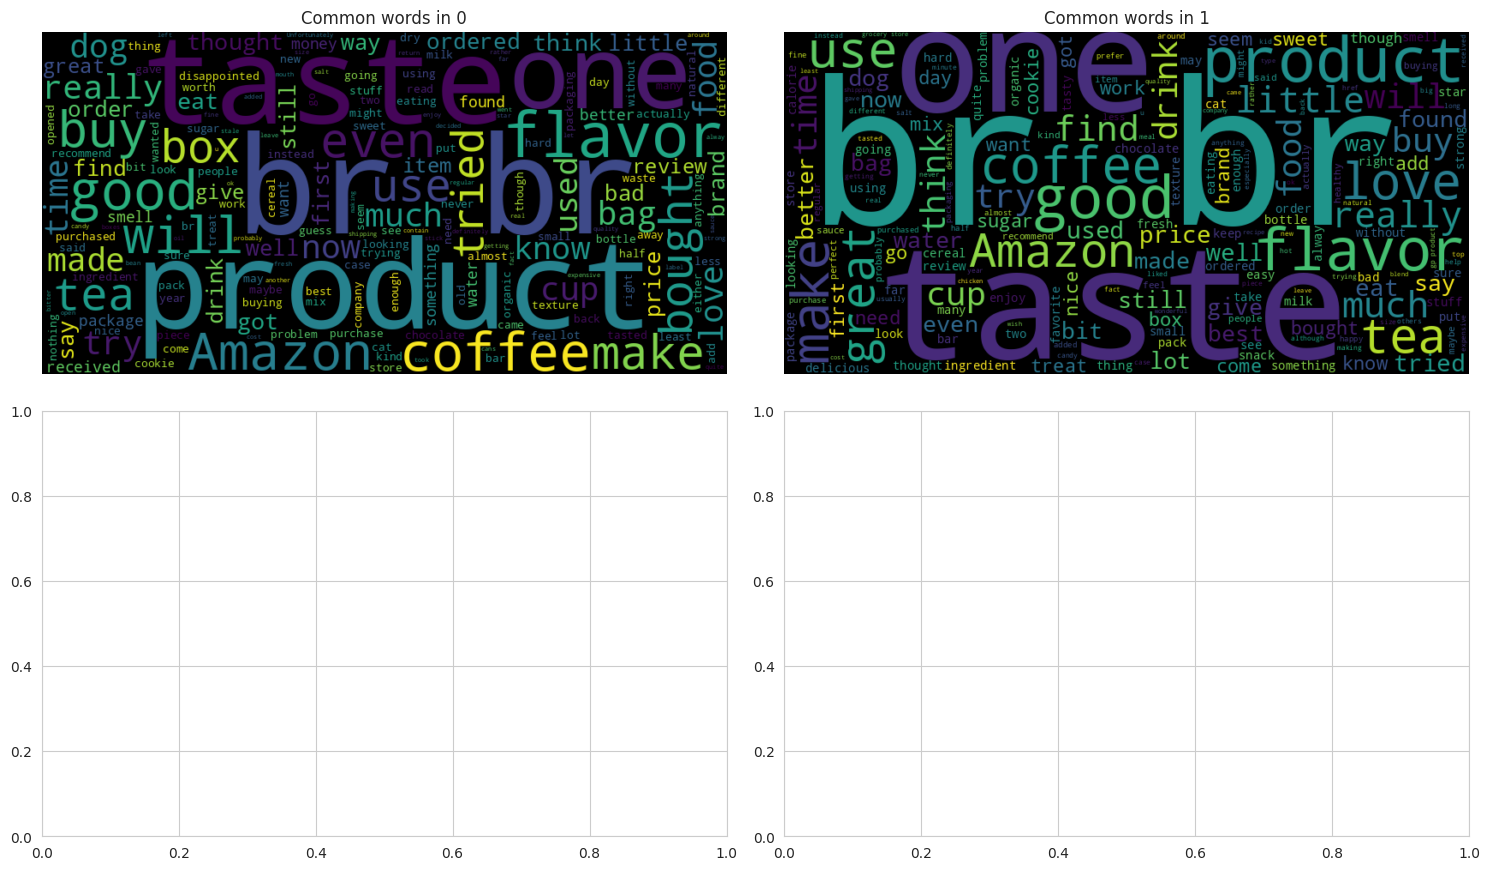

In [49]:
from wordcloud import WordCloud
fig , ax = plt.subplots(2,2,figsize=(15,9))

for i, label in enumerate(data['Sentiment'].unique()):
    text = ' '.join(data[data['Sentiment']==label]['Text'])
    # print(text, end ='\n\n')
    wordcloud = WordCloud(width=800, height=400).generate(text)
    row = i // 2
    col = i % 2
    ax[row][col].imshow(wordcloud, interpolation='bilinear')
    ax[row][col].axis('off')
    ax[row][col].set_title(f"Common words in {label}")
plt.tight_layout()
plt.show()

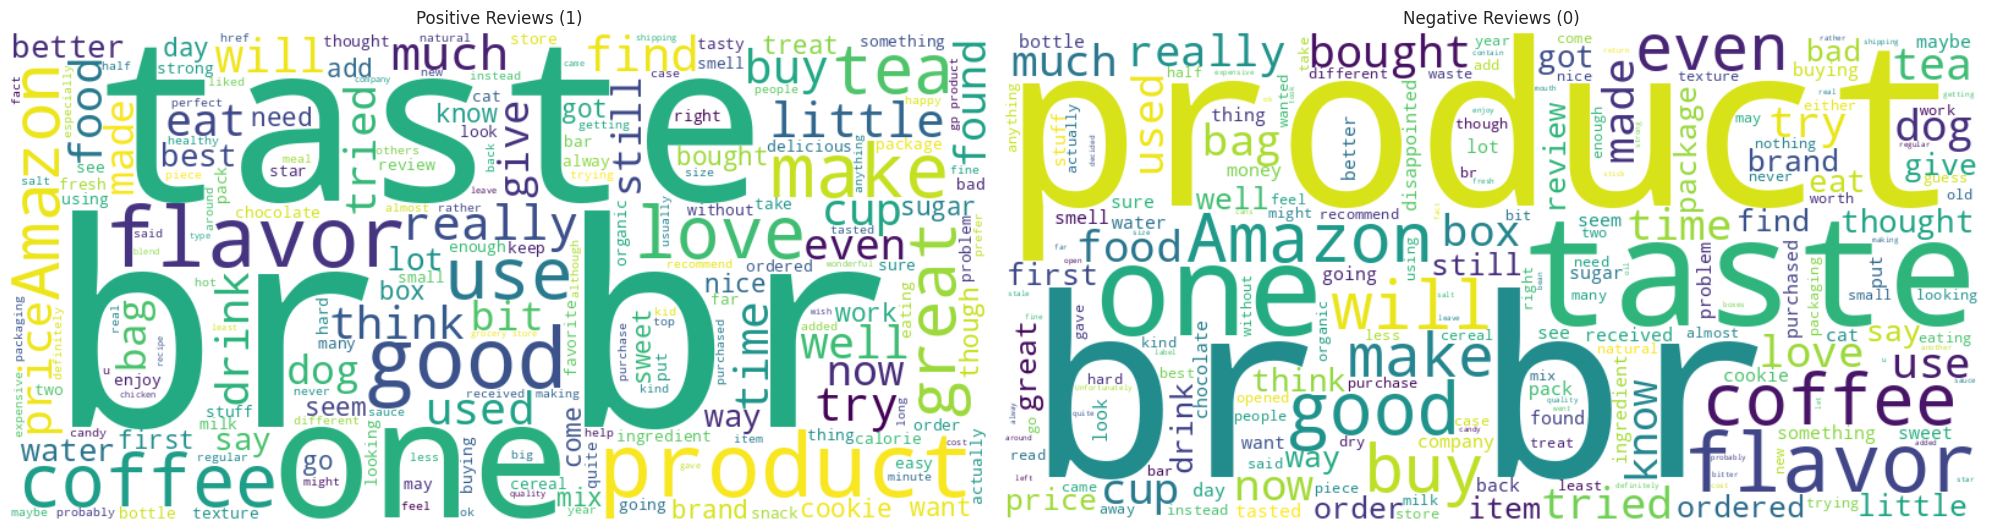

In [54]:
# Function to create a word cloud for a specific rating
def create_wordcloud_for_rating(df, rating_value):
    filtered_df = data[data['Sentiment'] == rating_value]

    if filtered_df.empty:
        print(f"No reviews found for rating: {rating_value}")
        return None

    reviews_text = filtered_df['Text'].str.cat(sep=' ')
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews_text)
    return wordcloud

# Generate word clouds for each rating
ratings = {
    "Positive Reviews (1)": 1,
    "Negative Reviews (0)": 0
}
ratings.items()
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

for ax, (rating_name, rating_value) in zip(axes, ratings.items()):
    wordcloud = create_wordcloud_for_rating(data, rating_value)

    if wordcloud is not None:
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.set_title(rating_name)
        ax.axis("off")

plt.tight_layout()
plt.show()

#### N-Grams

In [55]:
import collections
from collections import Counter
from nltk.util import ngrams

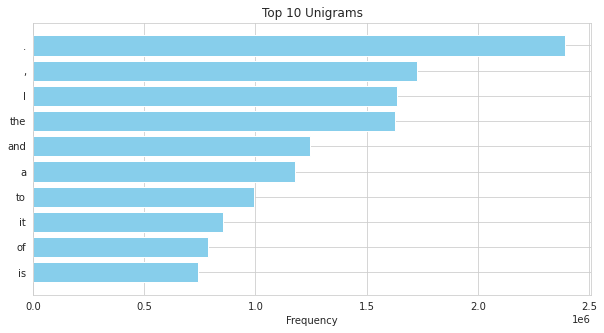

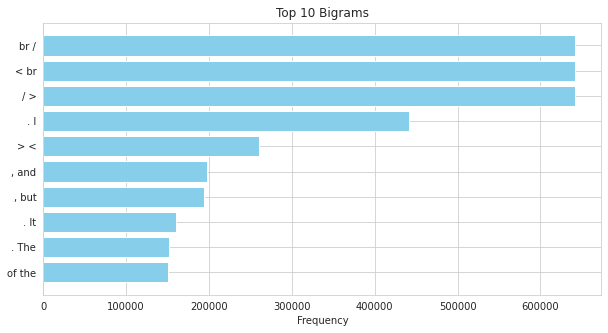

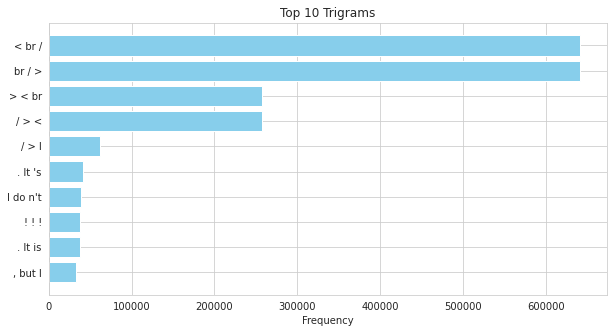

In [ ]:

def get_ngrams(text, n):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Generate n-grams
    n_grams = ngrams(tokens, n)
    return n_grams

def extract_ngrams(df, n):
    # Flatten the list of n-grams and count frequency
    n_grams = Counter()
    for text in df['Text']:
        n_grams.update(get_ngrams(text, n))
    return n_grams.most_common(10)  # Get the 10 most common n-grams

def plot_ngrams(ngrams_list, title):
    # Prepare data for plotting
    labels, values = zip(*ngrams_list)
    labels = [' '.join(gram) for gram in labels]  # Join tuples to create strings

    # Create bar plot
    plt.figure(figsize=(10, 5))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
    plt.show()

# Extract and plot unigrams
unigrams = extract_ngrams(data, 1)
plot_ngrams(unigrams, 'Top 10 Unigrams')

# Extract and plot bigrams
bigrams = extract_ngrams(data, 2)
plot_ngrams(bigrams, 'Top 10 Bigrams')

# Extract and plot trigrams
trigrams = extract_ngrams(data, 3)
plot_ngrams(trigrams, 'Top 10 Trigrams')

In [ ]:

def get_ngrams(text, n):
    # Tokenize the text
    tokens = nltk.word_tokenize(text)
    # Generate n-grams
    n_grams = ngrams(tokens, n)
    return n_grams

def extract_ngrams(df, n, Sentiment):
    # Filter the DataFrame by the specified rating
    filtered_df = data[data['Sentiment'] == Sentiment]
    # Flatten the list of n-grams and count frequency
    n_grams = Counter()
    for text in filtered_df['Text']:
        n_grams.update(get_ngrams(text, n))
    return n_grams.most_common(10)  # Get the 10 most common n-grams

def plot_ngrams(ngrams_list, title):
    # Prepare data for plotting
    labels, values = zip(*ngrams_list)
    labels = [' '.join(gram) for gram in labels]  # Join tuples to create strings

    # Create bar plot
    plt.figure(figsize=(10, 5))
    plt.barh(labels, values, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
    plt.show()

# Assuming df is your DataFrame containing the reviews with 'rating' and 'clean_text' columns
# Extract and plot unigrams for each rating
for Sentiment in ['Negative', 'Neutral','Positive']:
    unigrams = extract_ngrams(data, 1, Sentiment)
    plot_ngrams(unigrams, f'Top 10 Unigrams for {Sentiment} Reviews')

    # Extract and plot bigrams
    bigrams = extract_ngrams(data, 2, Sentiment)
    plot_ngrams(bigrams, f'Top 10 Bigrams for {Sentiment} Reviews')

    # Extract and plot trigrams
    trigrams = extract_ngrams(data, 3, Sentiment)
    plot_ngrams(trigrams, f'Top 10 Trigrams for {Sentiment} Reviews')


In [56]:
dfa=data[['Text','Sentiment']].duplicated().sum()
print([dfa])

[5]


In [57]:
data[data[['Text','Sentiment']].duplicated()].sort_values(by='Text')

,ProductId,Score,Time,Text,Sentiment,date,year,month,day
22012,B002IEZJMA,2,1333065600,"Coffee drinks aren't carbonated, so it's odd that I would describe this drink as being ""flat."" B...",0,1970-01-16 10:17:45.600,1970,1,16
12767,B000V1O28Y,2,1257552000,Hormel has came up with another shelf stable product. Of course to make it last over a year on t...,0,1970-01-15 13:19:12.000,1970,1,15
17583,B002WDCDXA,2,1308614400,I've been buying the Gevalia Signature Blend T-Discs for a few years and have been getting them ...,0,1970-01-16 03:30:14.400,1970,1,16
34386,B000N30EC8,4,1285891200,My husband and I have tried to change our eating habits this year and part of that has been maki...,1,1970-01-15 21:11:31.200,1970,1,15
18194,B0054TWPNC,2,1345507200,"Nong Shim's noodle that you need to boil to eat, it's good. But these ones, the noodle's texture...",0,1970-01-16 13:45:07.200,1970,1,16


In [58]:
data[['Text','Sentiment']].drop_duplicates(inplace=True)

In [59]:
data['Sentiment'].value_counts()

,count
Sentiment,
1,25500
0,25000


In [61]:
data.isnull().sum()

,0
ProductId,0
Score,0
Time,0
Text,0
Sentiment,0
date,0
year,0
month,0
day,0


<Axes: xlabel='Sentiment', ylabel='count'>

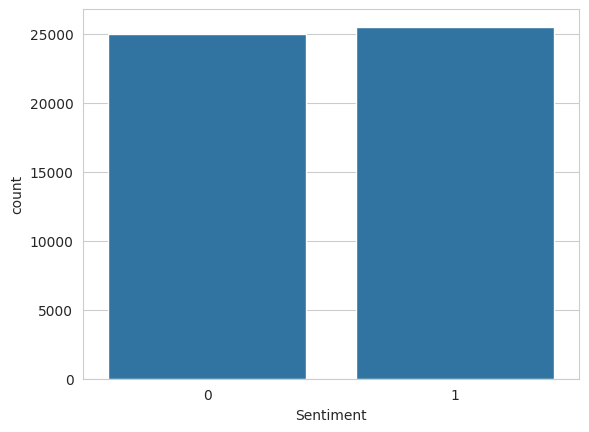

In [60]:

sns.countplot(x ='Sentiment', data = data)

In [62]:
data.columns

Index(['ProductId', 'Score', 'Time', 'Text', 'Sentiment', 'date', 'year',
       'month', 'day'],
      dtype='object')

In [ ]:
data=data[['Text', 'Sentiment']]

In [ ]:
data.head()

,Text,Sentiment
0,Its been two weeks and it still has not been shipped yet. I think I got robbed. I do not recomme...,0
1,"I bought this elsewhere (locally) because it was on sale, and it was absolutely disgusting. It t...",0
2,This cat food literally has the consistency of chicken noodle soup. It is at least 70% water. ...,0
3,"This review will make me sound really stupid, but whatever. I don't really care as long as peopl...",0
4,Not my idea of a good caramel. Flavors of ginger and pistachio dominated. Same for the chocola...,0


In [ ]:
data.to_csv('data.csv', index=False)

### PreProcessing - Text cleaning

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")
# Ensure you have the required NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords # Import the stopwords corpus
import spacy
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Load SpaCy English model
nlp = spacy.load("en_core_web_sm")
# Ensure you have the required NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Load English stop words
english_stopwords = set(stopwords.words('english'))
# Words to remove (add any words that are irrelevant for your analysis)
words_to_remove = {'br','---','br br','like','taste','just'}
#**Step 1:* convert all string to lowercase**
processed_df=data.copy()
processed_df['clean_text'] = processed_df['Text'].apply(lambda x: x.lower())
#***Step 2:* Remove stop words and some common words**
#Define stop words and common words
common_words = set(['game', 'com', 'unk', 'like'])
stop_words = set(stopwords.words('english')).union(common_words)
#function to remove stop words
def remove_stop_words_n_specific_words(text):
    """Remove stop words from text."""
    words = word_tokenize(str(text))
    words = [word for word in words if word not in words_to_remove]
    return " ".join([word for word in words if word.lower() not in english_stopwords])

processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: remove_stop_words_n_specific_words(x))
#***Step 3:* Remove punctuation**
#Function to remove punctuation
def remove_punc(txt):
    text_non_punct = "".join([char for char in txt if char not in string.punctuation])
    return text_non_punct

processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: remove_punc(x))
#***Step 4:* Remove digit and numbers**
def remove_digit(txt):
    text_non_digit = re.sub(r"\b(one|two|three|four|five|six|seven|eight|nine|ten|\d+)\b", '',txt).strip()
    return text_non_digit

processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: remove_digit(x))
#***Step 5:* Apply Tokenization**
processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: word_tokenize(x))
#***Step 6:* lemmatization**
lem = WordNetLemmatizer()
#function to lemmatize
def lemmatizing (txt):
    lemmtize = [lem.lemmatize(word,pos='v') for word in txt]
    return lemmtize

processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: lemmatizing(x))
#***Step 7:* Return from tokenization to text**
processed_df['clean_text'] = processed_df['clean_text'].apply(lambda x: ' '.join(x))
processed_df['clean_text'].head(3)

,clean_text
0,weeks still ship yet think get rob recommend
1,buy elsewhere locally sale absolutely disgust ...
2,cat food literally consistency chicken noodle ...


In [ ]:
processed_df.columns

Index(['Text', 'Sentiment', 'clean_text'], dtype='object')

In [ ]:
processed_df['Sentiment'].value_counts()

,count
Sentiment,
1,25500
0,25000


In [ ]:
processed_df["clean_text"].isna().sum()

0

In [ ]:
processed_df.to_csv('preprocessed_data.csv', index=False)

### PreProcessing -  Data Splitting

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import  GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
# Split the data into training and testing sets
X = processed_df[['clean_text']]
y = processed_df['Sentiment']

In [ ]:
y

,Sentiment
0,0
1,0
2,0
3,0
4,0
...,...
50495,1
50496,1
50497,1
50498,1


In [ ]:
X

,clean_text
0,weeks still ship yet think get rob recommend
1,buy elsewhere locally sale absolutely disgust taste smell vinegar chemicals creamy cheesy flavor...
2,cat food literally consistency chicken noodle soup least water mean straight water moisture shak...
3,review make sound really stupid whatever nt really care long people find s real avoid mistake ge...
4,idea good caramel flavor ginger pistachio dominate chocolate walnut orange honey varieties miss ...
...,...
50495,take cursory look review history realize nt exactly make career rat gum new trident vitality dar...
50496,never see cat picky current cat touch moist food fresh food milk find dry foods eat science diet...
50497,pb2 amaze much lower calories regular peanut butter taste good natural flavor without oily textu...
50498,work c nonprofit cat rescue foster sick cat well enough go forever home recently take kitty some...


In [ ]:
# Pass the transformed data to train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### PreProcessing - Data Vectorization

#### TFIDF

In [ ]:
# TF-IDF vectorizer for text
text_vectorizer = TfidfVectorizer()
# Transform the text data using the vectorizer
X_train_vectorized = text_vectorizer.fit_transform(X_train['clean_text'])
X_test_vectorized = text_vectorizer.transform(X_test['clean_text'])

* ###### Save TF-IDF

In [ ]:
# Import the joblib library
import joblib

In [ ]:
joblib.dump(text_vectorizer, 'TFIDF_model.pkl')

['TFIDF_model.pkl']

In [ ]:
X_train_vectorized.shape

(37875, 41175)

In [ ]:
X_test_vectorized.shape

(12625, 41175)

#### Word2Vec

In [ ]:
import numpy as np
from gensim.models import Word2Vec
from sklearn.base import BaseEstimator, TransformerMixin
# Step 1: Train a Word2Vec model once and create embeddings for the full dataset
sentences = [text.split() for text in X_train['clean_text']]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1, epochs=10)

# Step 2: Transform texts to average Word2Vec embeddings once
def get_avg_word2vec(text):
    words = text.split()
    word_vecs = [word2vec.wv[word] for word in words if word in word2vec.wv]
    return np.mean(word_vecs, axis=0) if word_vecs else np.zeros(word2vec.vector_size)

# Create an embedding matrix for all texts
X_train_embeddings = np.array([get_avg_word2vec(text) for text in X_train['clean_text']])
X_test_embeddings = np.array([get_avg_word2vec(text) for text in X_test['clean_text']])
# Save the Word2Vec model
word2vec.save("word2vec_model.pkl")
# Optionally, check the shape of the embeddings to verify they align as expected
print("X_train embeddings shape:", X_train_embeddings.shape)
print("X_test embeddings shape:", X_test_embeddings.shape)

X_train embeddings shape: (37875, 100)
X_test embeddings shape: (12625, 100)


### Models Training and Testing
* ## Model selection
* #### Naive Bayes
* #### XGBoost
* #### Logistic Regression
* #### Random Forest



In [ ]:
def label_sentiments(rating):
    if (rating == 5) or (rating == 4) or (rating == 3):
        return 1
    else:
        return 0

data["Sentiment"] = data["Score"].apply(label_sentiments)

#### Models Training - TFIDF


Classifier: Logistic_Regression
Train Accuracy: 0.8374125412541255
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84     18783
           1       0.84      0.84      0.84     19092

    accuracy                           0.84     37875
   macro avg       0.84      0.84      0.84     37875
weighted avg       0.84      0.84      0.84     37875

Test Accuracy: 0.7824158415841584
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78      6217
           1       0.79      0.78      0.78      6408

    accuracy                           0.78     12625
   macro avg       0.78      0.78      0.78     12625
weighted avg       0.78      0.78      0.78     12625



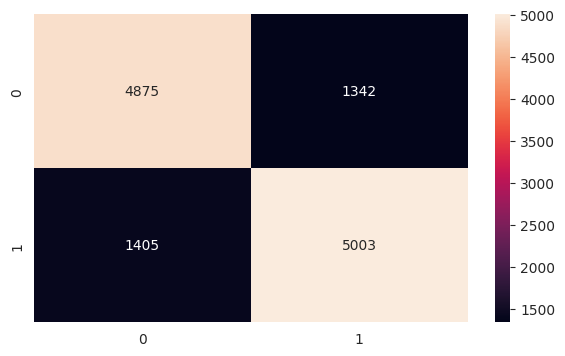

--------------------------------------------------------------------------

Classifier: Random_Forest
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18783
           1       1.00      1.00      1.00     19092

    accuracy                           1.00     37875
   macro avg       1.00      1.00      1.00     37875
weighted avg       1.00      1.00      1.00     37875

Test Accuracy: 0.7651485148514852
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      6217
           1       0.77      0.76      0.77      6408

    accuracy                           0.77     12625
   macro avg       0.77      0.77      0.77     12625
weighted avg       0.77      0.77      0.77     12625



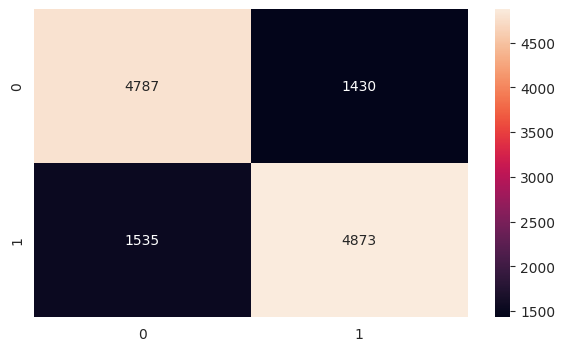

--------------------------------------------------------------------------

Classifier: XGBoost
Train Accuracy: 0.8538613861386138
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     18783
           1       0.86      0.85      0.85     19092

    accuracy                           0.85     37875
   macro avg       0.85      0.85      0.85     37875
weighted avg       0.85      0.85      0.85     37875

Test Accuracy: 0.7568316831683168
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.76      0.76      6217
           1       0.76      0.75      0.76      6408

    accuracy                           0.76     12625
   macro avg       0.76      0.76      0.76     12625
weighted avg       0.76      0.76      0.76     12625



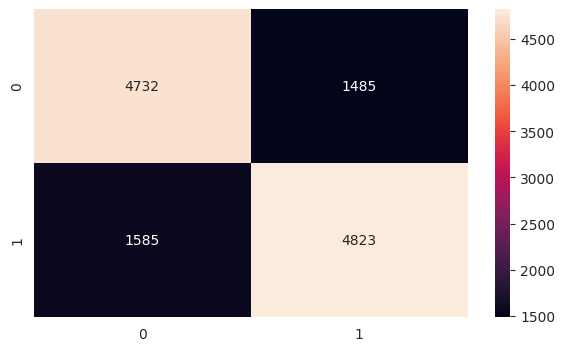

--------------------------------------------------------------------------
CPU times: user 3min 49s, sys: 2.78 s, total: 3min 52s
Wall time: 3min 53s


In [ ]:
%%time
# Define multiple classifiers to test
classifiers = {
    "Logistic_Regression": LogisticRegression(max_iter=600, random_state=42),
    "Random_Forest": RandomForestClassifier(random_state=42),
    "Naive_Bayes": MultinomialNB(alpha=0.01),
    #"Support_Vector_Classifier": SVC(),
    # "K-Nearest_Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Step 5: Loop through each classifier, train, and evaluate
for name, clf in classifiers.items():
    # Train the classifier directly on `y_train`
    clf = clf.fit(X_train_vectorized, y_train)

    # Make predictions on the train and test sets
    y_train_pred = clf.predict(X_train_vectorized)
    y_test_pred = clf.predict(X_test_vectorized)

    # Print evaluation metrics
    print(f"\nClassifier: {name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(7, 4))
    Cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(Cm, annot=True, fmt='d')
    plt.show()

    # Save the model
    joblib.dump(clf, f'{name}_model.pkl')
    print("--------------------------------------------------------------------------")


In [ ]:
data.columns

Index(['Text', 'Sentiment'], dtype='object')

#### Models Training - Word2Vec

```
# This is formatted as code
```




Classifier: Logistic_Regression
Train Accuracy: 0.7661782178217822
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     18783
           1       0.77      0.77      0.77     19092

    accuracy                           0.77     37875
   macro avg       0.77      0.77      0.77     37875
weighted avg       0.77      0.77      0.77     37875

Test Accuracy: 0.7653069306930693
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      6217
           1       0.77      0.76      0.77      6408

    accuracy                           0.77     12625
   macro avg       0.77      0.77      0.77     12625
weighted avg       0.77      0.77      0.77     12625



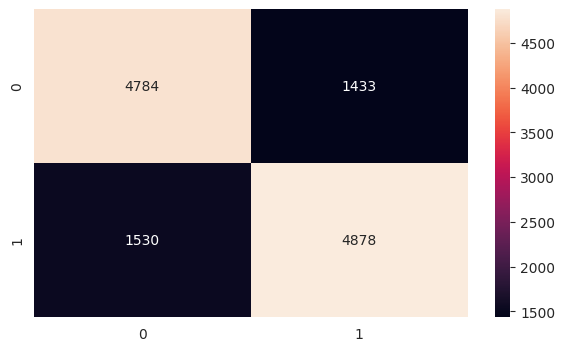

--------------------------------------------------------------------------

Classifier: Random_Forest
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18783
           1       1.00      1.00      1.00     19092

    accuracy                           1.00     37875
   macro avg       1.00      1.00      1.00     37875
weighted avg       1.00      1.00      1.00     37875

Test Accuracy: 0.7394851485148515
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      6217
           1       0.75      0.73      0.74      6408

    accuracy                           0.74     12625
   macro avg       0.74      0.74      0.74     12625
weighted avg       0.74      0.74      0.74     12625



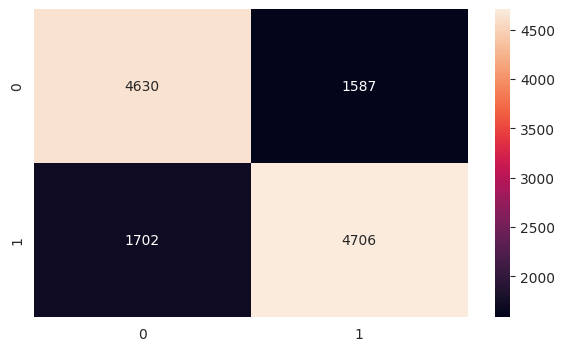

--------------------------------------------------------------------------

Classifier: XGBoost
Train Accuracy: 0.9372937293729373
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     18783
           1       0.94      0.94      0.94     19092

    accuracy                           0.94     37875
   macro avg       0.94      0.94      0.94     37875
weighted avg       0.94      0.94      0.94     37875

Test Accuracy: 0.750970297029703
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75      6217
           1       0.76      0.75      0.75      6408

    accuracy                           0.75     12625
   macro avg       0.75      0.75      0.75     12625
weighted avg       0.75      0.75      0.75     12625



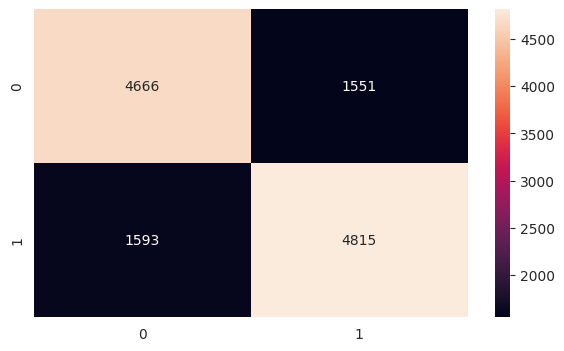

--------------------------------------------------------------------------
CPU times: user 1min 17s, sys: 746 ms, total: 1min 18s
Wall time: 1min 18s


In [ ]:
%%time
from sklearn.preprocessing import LabelEncoder

# Define multiple classifiers to test
classifiers = {
    "Logistic_Regression": LogisticRegression(max_iter=700, random_state=42),
    "Random_Forest": RandomForestClassifier(random_state=42),
    #"Support_Vector_Classifier": SVC(),
    #"K-Nearest_Neighbors": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Assuming 'y_train' is your target variable
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder to your training data and transform it
y_train_encoded = label_encoder.fit_transform(y_train)

# Step 5: Loop through each classifier, train, and evaluate
for name, clf in classifiers.items():
    # For XGBoost, use the encoded target variable
    if name == "XGBoost":
        clf = clf.fit(X_train_embeddings, y_train_encoded)
    else:
        clf = clf.fit(X_train_embeddings, y_train)

    # Make predictions on the test set
    y_train_pred = clf.predict(X_train_embeddings)
    y_test_pred = clf.predict(X_test_embeddings)

    # For XGBoost, inverse transform the predictions to get original labels
    if name == "XGBoost":
        y_train_pred = label_encoder.inverse_transform(y_train_pred)
        y_test_pred = label_encoder.inverse_transform(y_test_pred)


    # Print evaluation metrics
    print(f"\nClassifier: {name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))
    plt.figure(figsize = (7,4))
    Cm = confusion_matrix(y_test, y_test_pred) # Use y_test_pred for confusion matrix
    sns.heatmap(Cm ,annot =True, fmt='d')
    plt.show()
    joblib.dump(clf, f'{name}_Word2vec_model.pkl')
    print("--------------------------------------------------------------------------")

Starting grid search for Logistic_Regression...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Logistic_Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Classifier: Logistic_Regression
Train Accuracy: 0.7661782178217822
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.76      0.76     18783
           1       0.77      0.77      0.77     19092

    accuracy                           0.77     37875
   macro avg       0.77      0.77      0.77     37875
weighted avg       0.77      0.77      0.77     37875

Test Accuracy: 0.7653069306930693
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.76      6217
           1       0.77      0.76      0.77      6408

    accuracy                           0.77     12625
   macro avg       0.77      0.77      0.77     12625
weighted avg       0.77      0.77      0.77     12625



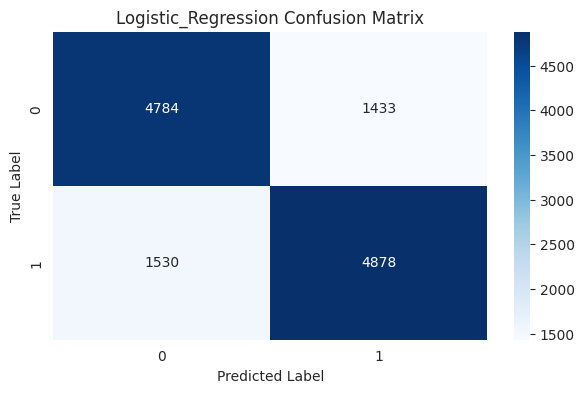

Model saved successfully.
--------------------------------------------------------------------------
Starting grid search for Random_Forest...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Random_Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}

Classifier: Random_Forest
Train Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18783
           1       1.00      1.00      1.00     19092

    accuracy                           1.00     37875
   macro avg       1.00      1.00      1.00     37875
weighted avg       1.00      1.00      1.00     37875

Test Accuracy: 0.7447128712871287
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.74      0.74      6217
           1       0.75      0.75      0.75      6408

    accuracy                           0.74     12625
   macro avg       0.7

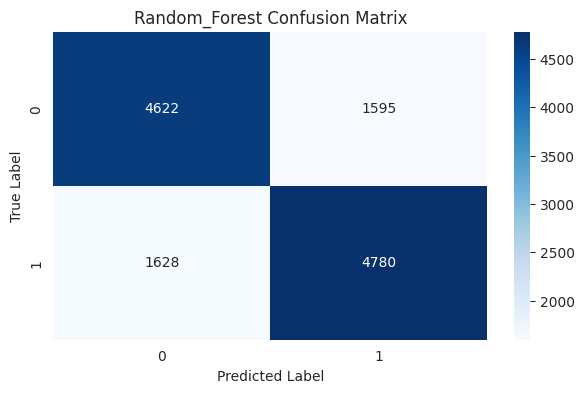

Model saved successfully.
--------------------------------------------------------------------------
Starting grid search for XGBoost...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Define parameter grids for each classifier
param_grids = {
    "Logistic_Regression": {
        'C': [0.1, 1, 10],  # Regularization strength
        'penalty': ['l1', 'l2'],  # Norm used in penalization
        'solver': ['lbfgs','liblinear', 'saga']
    },
    "Random_Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 6, 10],
        'learning_rate': [0.01, 0.1, 0.2,0.3],
        'booster':['gbtree', 'gblinear' , 'dart']
    }
}

# Label encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Loop through each classifier and apply grid search
for name, clf in classifiers.items():
    print(f"Starting grid search for {name}...")
    grid_search = GridSearchCV(clf, param_grids[name], cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

    if name == "XGBoost":
        # Use the encoded target variable for XGBoost
        grid_search.fit(X_train_embeddings, y_train_encoded)
    else:
        grid_search.fit(X_train_embeddings, y_train)

    # Get the best model and parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best parameters for {name}: {best_params}")

    # Train and evaluate the best model on the test set
    if name == "XGBoost":
        y_train_pred = best_model.predict(X_train_embeddings)
        y_test_pred = best_model.predict(X_test_embeddings)

        # Convert predictions back to original labels
        y_train_pred = label_encoder.inverse_transform(y_train_pred)
        y_test_pred = label_encoder.inverse_transform(y_test_pred)
    else:
        y_train_pred = best_model.predict(X_train_embeddings)
        y_test_pred = best_model.predict(X_test_embeddings)

    # Print evaluation metrics
    print(f"\nClassifier: {name}")
    print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
    print("Classification Report:\n", classification_report(y_train, y_train_pred))
    print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
    print("Classification Report:\n", classification_report(y_test, y_test_pred))

    # Plot confusion matrix
    plt.figure(figsize=(7, 4))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Save the best model
    joblib.dump(best_model, f'{name}_Word2vec_best_model.pkl')
    print("Model saved successfully.")
    print("--------------------------------------------------------------------------")


###

```
# This is formatted as code
```

 Grid Search for Logistic regression


#### Grid Search for Logistic regression with Word2Vec

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Set up the logistic regression model
log_reg = LogisticRegression(max_iter=600)  # Increase max_iter to ensure convergence

# Step 2: Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'solver': ['saga']  # 'saga' supports l1, l2, and elasticnet penalties
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Step 4: Fit the grid search to the training data
grid_search.fit(X_train_embeddings, y_train)

# Step 5: Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Step 6: Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_embeddings)

# Print classification report and accuracy
print("Test set accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.7650693069306931
Test set accuracy: 0.7668118811881188
              precision    recall  f1-score   support

           1       0.76      0.77      0.77      6217
           2       0.77      0.76      0.77      6408

    accuracy                           0.77     12625
   macro avg       0.77      0.77      0.77     12625
weighted avg       0.77      0.77      0.77     12625



In [ ]:
import joblib

# Save the best model found by GridSearchCV
joblib.dump(best_model, 'logistic_regression_W2V_best_model.pkl')
print("Model saved successfully.")


#### Grid Search for Logistic regression with TFIDF

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Step 1: Set up the logistic regression model
log_reg = LogisticRegression(max_iter=600)  # Increase max_iter to ensure convergence

# Step 2: Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'solver': ['saga']  # 'saga' supports l1, l2, and elasticnet penalties
}

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Step 4: Fit the grid search to the training data
grid_search.fit(X_train_vectorized, y_train)

# Step 5: Print the best parameters and best score
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Step 6: Evaluate the best model on the test set
model = grid_search.best_estimator_
y_test_pred = model.predict(X_test_vectorized)

# Print classification report and accuracy
print("Test set accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.7650693069306931
Test set accuracy: 0.7668118811881188
              precision    recall  f1-score   support

           1       0.76      0.77      0.77      6217
           2       0.77      0.76      0.77      6408

    accuracy                           0.77     12625
   macro avg       0.77      0.77      0.77     12625
weighted avg       0.77      0.77      0.77     12625



In [ ]:
import joblib

# Save the best model found by GridSearchCV
joblib.dump(best_model, 'logistic_regression_TFIDF_best_model.pkl')
print("Model saved successfully.")


#### LSTM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
!pip install tensorflow==2.18.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 20.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras import regularizers

In [ ]:
reviews = processed_df['clean_text'].values
sentiments = processed_df['Sentiment'].values

In [ ]:
reviews

array(['weeks still ship yet think get rob recommend',
       'buy elsewhere locally sale absolutely disgust taste smell vinegar chemicals creamy cheesy flavor expect queso ve never meet queso nt make mistake waste money garbage avoid product nt want permanently damage bud',
       'cat food literally consistency chicken noodle soup least water mean straight water moisture shake sound s full liquid be cat nt even bother smell much less eat darn near anything first time dump bowl look kind soup fragment grind meat second time try squeeze lid would squeeze water tuna yield maybe ounces food ounce cat would nt eat either summary pathetic excuse cat food ever see live cat years',
       ...,
       'pb2 amaze much lower calories regular peanut butter taste good natural flavor without oily texture pb eat',
       'work c nonprofit cat rescue foster sick cat well enough go forever home recently take kitty someone lock basement without food water leave die could see every bone body totally st

In [ ]:
# Apply tokenization
tokenizer=Tokenizer(num_words=2000)
tokenizer.fit_on_texts(reviews)
sequences=tokenizer.texts_to_sequences(reviews)

# Padding sequences on reviews to have same length
max_len = 150  # Adjusted max length as reviews are longer
# X as input
X = pad_sequences(sequences, maxlen=max_len)

# Convert sentiments to numpy array
y = np.array(sentiments)

In [ ]:
import joblib # Import joblib directly
# Save the tokenizer
joblib.dump(tokenizer, 'lstm_tokenizer.pkl')

['lstm_tokenizer.pkl']

In [ ]:
print(reviews)

['weeks still ship yet think get rob recommend'
 'buy elsewhere locally sale absolutely disgust taste smell vinegar chemicals creamy cheesy flavor expect queso ve never meet queso nt make mistake waste money garbage avoid product nt want permanently damage bud'
 'cat food literally consistency chicken noodle soup least water mean straight water moisture shake sound s full liquid be cat nt even bother smell much less eat darn near anything first time dump bowl look kind soup fragment grind meat second time try squeeze lid would squeeze water tuna yield maybe ounces food ounce cat would nt eat either summary pathetic excuse cat food ever see live cat years'
 ...
 'pb2 amaze much lower calories regular peanut butter taste good natural flavor without oily texture pb eat'
 'work c nonprofit cat rescue foster sick cat well enough go forever home recently take kitty someone lock basement without food water leave die could see every bone body totally starve convince eat move drink clean diffic

In [ ]:
# Check seuences hat icludes indices
print(sequences[:5])

[[443, 59, 83, 342, 16, 4, 75], [8, 947, 886, 608, 399, 718, 18, 76, 858, 979, 634, 1951, 3, 108, 40, 86, 1199, 1, 10, 657, 254, 133, 1021, 568, 6, 1, 47, 687, 912], [77, 24, 1128, 581, 195, 1113, 226, 210, 42, 267, 845, 42, 1656, 653, 658, 2, 245, 541, 1383, 77, 1, 31, 833, 76, 22, 88, 17, 724, 161, 45, 25, 1202, 384, 39, 199, 226, 321, 380, 242, 25, 11, 844, 923, 7, 844, 42, 734, 141, 743, 24, 561, 77, 7, 1, 17, 209, 77, 24, 144, 72, 362, 77, 154], [60, 10, 658, 21, 754, 1, 21, 328, 162, 130, 14, 2, 160, 568, 657, 4, 327, 34, 63, 157, 229, 154, 122, 196, 335, 335, 17, 754, 431, 77, 196, 563, 536, 154, 1054, 168, 501, 754, 1157, 24, 8, 834, 362, 874, 84, 77, 168, 201, 210, 1088, 17, 7, 17, 331, 404, 517, 53, 91, 17, 4, 1269, 25, 68, 2, 70, 24, 144, 10, 20, 51, 1608, 1010, 1, 16, 38, 1027, 120, 1402, 28, 10, 22, 512, 45, 11, 501, 34, 157, 170, 1554, 219, 384, 1, 68, 7, 419, 56, 1185, 119, 176, 623, 109, 1, 68, 209, 7, 176, 19, 884, 954, 109, 340, 196, 1897, 221, 1472, 42, 368, 4, 24, 1

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define LSTM Parameters
voca_size=2000  # as input
embedding_size=200  # as output

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=voca_size,output_dim=embedding_size,input_length=max_len))
model.add(LSTM(256,recurrent_dropout=0.3,dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid',kernel_regularizer=regularizers.l2(0.01)))

In [ ]:
# Compile the model
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
#op=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, verbose=1)
# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'lstm_model.keras',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the model with the best validation loss
    mode='min',  # 'min' because lower loss is better
    verbose=1  # Verbosity mode
)

# Train the LSTM model
history1=model.fit(X_train, y_train,
          epochs=10,
          batch_size=128,
          validation_data=(X_test, y_test)
          , callbacks=[early_stopping,Lr_schedule,model_checkpoint])

Epoch 1/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.6726 - loss: 0.6021
Epoch 1: val_loss improved from inf to 0.54048, saving model to lstm_model.keras
316/316 ━━━━━━━━━━━━━━━━━━━━ 187s 586ms/step - accuracy: 0.6728 - loss: 0.6019 - val_accuracy: 0.7665 - val_loss: 0.5405 - learning_rate: 0.0010
Epoch 2/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 535ms/step - accuracy: 0.7766 - loss: 0.4807
Epoch 2: val_loss improved from 0.54048 to 0.48268, saving model to lstm_model.keras
316/316 ━━━━━━━━━━━━━━━━━━━━ 185s 586ms/step - accuracy: 0.7766 - loss: 0.4807 - val_accuracy: 0.7725 - val_loss: 0.4827 - learning_rate: 0.0010
Epoch 3/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - accuracy: 0.7975 - loss: 0.4523
Epoch 3: val_loss improved from 0.48268 to 0.47729, saving model to lstm_model.keras
316/316 ━━━━━━━━━━━━━━━━━━━━ 185s 585ms/step - accuracy: 0.7975 - loss: 0.4523 - val_accuracy: 0.7754 - val_loss: 0.4773 - learning_rate: 0.0010
Epoch 4/10
316/316 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/s

In [ ]:
# Save the final model in .h5 format
loaded_model=model.save('lstm_model.h5')

In [ ]:
# Load the model to access it (or use 'model' directly if you haven't reassigned it)
from tensorflow import keras
loaded_model = keras.models.load_model('final_model.h5')

# Now you can access the summary
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 200)          400000    
                                                                 
 lstm (LSTM)                 (None, 256)               467968    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 868225 (3.31 MB)
Trainable params: 868225 (3.31 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(tf.__version__)

2.15.0


##### Trainning and Validation Accuracy



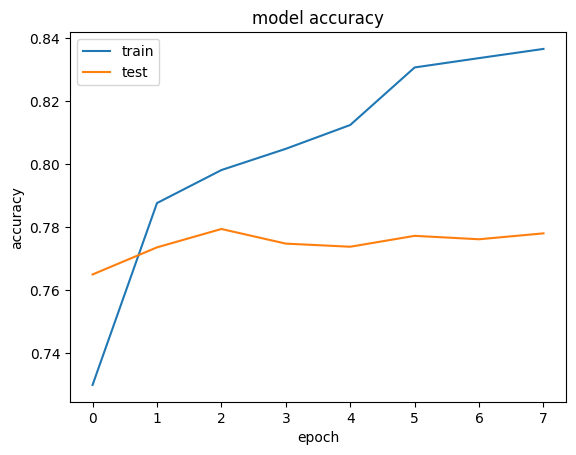

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Trainning and Validation Loss

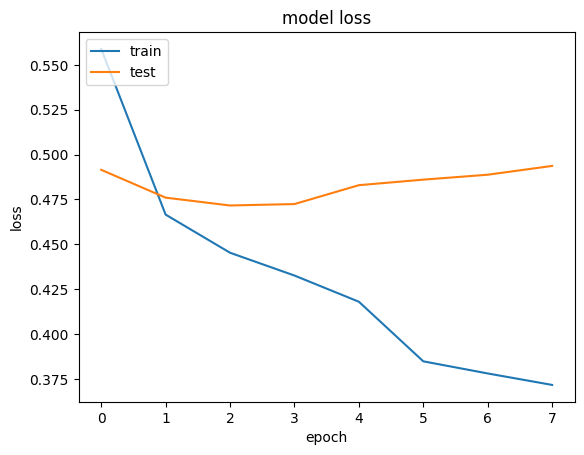

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

In [ ]:
# Evaluate the model on the train set
loss, accuracy = model.evaluate(X_train, y_train)

# Print the final accuracy
print(f"Final Train Accuracy: {accuracy * 100:.2f}%")

1263/1263 [==============================] - 62s 49ms/step - loss: 0.4130 - accuracy: 0.8169
Final Train Accuracy: 81.69%


In [ ]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)

# Print the final accuracy
print(f"Final Test Accuracy: {accuracy * 100:.2f}%")

316/316 [==============================] - 16s 49ms/step - loss: 0.4717 - accuracy: 0.7794
Final Test Accuracy: 77.94%
